In [3]:
#import torch
#from transformers import pipeline
import pandas as pd



In [1]:
import pandas as pd

final_data = pd.read_csv("/work/MarkusLundsfrydJensen#1865/Bachelor_project/cleaned_annotation_data_final.csv")

final_data.pop('Unnamed: 0')


final_data.head()

,date,agenda,speechnumber,speaker,party,party.facts.id,chair,terms,text,parliament,iso3country,da_segmented_text,translated_text,blame_in_text
0,1997-10-07,Dagsorden,1,Gert Petersen,NaN,NaN,True,191,Mødet er åbnet. I henhold til grundloven er Fo...,DK-Folketing,DNK,"['Mødet er åbnet.', 'I henhold til grundloven ...","['The meeting is open.', 'Under the Constituti...","[{'sequence': 'The meeting is open.', 'labels'..."
1,1997-10-07,Dagsorden,2,Formanden,NaN,NaN,True,182,"Jeg vil gerne takke Tinget for den tillid, man...",DK-Folketing,DNK,"['Jeg vil gerne takke Tinget for den tillid, m...",['I would like to thank Things for the confide...,[{'sequence': 'I would like to thank Things fo...
2,1997-10-07,Statsministerens redegørelse i henhold til gru...,3,Poul Nyrup Rasmussen,S,379.0,False,18662,For 25 år siden sagde et flertal i befolkninge...,DK-Folketing,DNK,['For 25 år siden sagde et flertal i befolknin...,"['Twenty-five years ago, a majority of the peo...","[{'sequence': 'Twenty-five years ago, a majori..."
3,1997-10-09,1) Indstilling fra Udvalget til Valgs Prøvelse.,2,Formanden,NaN,NaN,True,47,Fra Udvalget til Valgs Prøvelse har jeg modtag...,DK-Folketing,DNK,"['Fra Udvalget til Valgs', 'Prøvelse', 'har je...",['From the Committee to the Committee of the R...,[{'sequence': 'From the Committee to the Commi...
4,1997-10-09,2) Forhandling om redegørelse nr. R 1.,3,Torben Lund,S,379.0,False,2865,Vi står over for en meget afgørende folketings...,DK-Folketing,DNK,['Vi står over for en meget afgørende folketin...,['We are faced with a very crucial parliamenta...,[{'sequence': 'We are faced with a very crucia...


In [2]:
test_data = final_data.loc[0:4]



In [5]:
test_data.loc[0]['translated_text']

'[\'The meeting is open.\', \'Under the Constitution, the Folketing has today met for its first meeting in the new parliamentary year.\', "As the Member who has long since been a member of the Parliament, it is incumbent on me, pursuant to Paragraph 2 (3) of the Danish Parliament\'s Rules of Procedure, to direct the election of the Bureau of Things and the President of Parliament, Mr Erling Olsen, the Social Democratic Party, has been nominated by all the Members of Parliament.", \'In the absence of any other recommendations, I shall consider the recommendation as adopted.\', \'(Stop).\', \'It has been adopted.\', "As Vice-Presidents, in addition to the party to which the President belongs, the four largest parties in the Chamber have appointed the following members: first Vice-President, Mr Ivar Hansen, Left, second Vice-President, Mr Henning Grove, Conservative People\'s Party, third Vice-President, Mrs Margrete Auken, Socialist People\'s Party, and fourth Vice-President, Mrs Elisabe

In [6]:
import ast
import swifter  # optional for parallel CPU usage

def extract_blame_from_paragraph_lookup(input_str):
    """
    Returns a binary list for blame per sentence:
    1 if blame is highest among labels and >= 0.8, else 0
    Handles arbitrary label order.
    """
    try:
        
        sentence_list = ast.literal_eval(input_str)
    except Exception:
        return []

    # List comprehension is faster than appending in a loop
    blame_binary = [
        int(
            (label_score := {label: score for label, score in zip(sent['labels'], sent['scores'])})['blame']
            >= max(label_score.get('praise', 0.0), label_score.get('neutral', 0.0), 0.8)
        )
        for sent in sentence_list
    ]

    return blame_binary


In [7]:
import ipywidgets

# Parallelize using swifter
final_data['blame_binary'] = final_data['blame_in_text'].swifter.apply(extract_blame_from_paragraph_lookup)




Pandas Apply:   0%|          | 0/36314 [00:00<?, ?it/s]

In [8]:
final_data.head()

,date,agenda,speechnumber,speaker,party,party.facts.id,chair,terms,text,parliament,iso3country,da_segmented_text,translated_text,blame_in_text,blame_binary
0,1997-10-07,Dagsorden,1,Gert Petersen,NaN,NaN,True,191,Mødet er åbnet. I henhold til grundloven er Fo...,DK-Folketing,DNK,"['Mødet er åbnet.', 'I henhold til grundloven ...","['The meeting is open.', 'Under the Constituti...","[{'sequence': 'The meeting is open.', 'labels'...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,1997-10-07,Dagsorden,2,Formanden,NaN,NaN,True,182,"Jeg vil gerne takke Tinget for den tillid, man...",DK-Folketing,DNK,"['Jeg vil gerne takke Tinget for den tillid, m...",['I would like to thank Things for the confide...,[{'sequence': 'I would like to thank Things fo...,"[0, 0, 0, 0, 0, 0, 0, 0]"
2,1997-10-07,Statsministerens redegørelse i henhold til gru...,3,Poul Nyrup Rasmussen,S,379.0,False,18662,For 25 år siden sagde et flertal i befolkninge...,DK-Folketing,DNK,['For 25 år siden sagde et flertal i befolknin...,"['Twenty-five years ago, a majority of the peo...","[{'sequence': 'Twenty-five years ago, a majori...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1997-10-09,1) Indstilling fra Udvalget til Valgs Prøvelse.,2,Formanden,NaN,NaN,True,47,Fra Udvalget til Valgs Prøvelse har jeg modtag...,DK-Folketing,DNK,"['Fra Udvalget til Valgs', 'Prøvelse', 'har je...",['From the Committee to the Committee of the R...,[{'sequence': 'From the Committee to the Commi...,"[0, 0, 0, 0, 0]"
4,1997-10-09,2) Forhandling om redegørelse nr. R 1.,3,Torben Lund,S,379.0,False,2865,Vi står over for en meget afgørende folketings...,DK-Folketing,DNK,['Vi står over for en meget afgørende folketin...,['We are faced with a very crucial parliamenta...,[{'sequence': 'We are faced with a very crucia...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [18]:
for indx in range(len(final_data)):

    temo = final_data.loc[indx]

    l_da = len(ast.literal_eval(temo['da_segmented_text']))
    l_en = len(ast.literal_eval(temo['translated_text']))
    l_bl = len(ast.literal_eval(temo['blame_in_text']))

    if l_da != l_en != l_bl:
        print(temo)

In [31]:
#save data

final_data.to_csv("/work/MarkusLundsfrydJensen#1865/Bachelor_project/final_annotation_Data_with_blame_04_10.csv")

In [71]:
final_data = pd.read_csv("/work/MarkusLundsfrydJensen#1865/Bachelor_project/final_annotation_Data_with_blame_04_10.csv")

In [ ]:

#final_data.pop('Unnamed: 0')
final_data.head()


,date,agenda,speechnumber,speaker,party,party.facts.id,chair,terms,text,parliament,iso3country,da_segmented_text,translated_text,blame_in_text,blame_binary
0,1997-10-07,Dagsorden,1,Gert Petersen,NaN,NaN,True,191,Mødet er åbnet. I henhold til grundloven er Fo...,DK-Folketing,DNK,"['Mødet er åbnet.', 'I henhold til grundloven ...","['The meeting is open.', 'Under the Constituti...","[{'sequence': 'The meeting is open.', 'labels'...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,1997-10-07,Dagsorden,2,Formanden,NaN,NaN,True,182,"Jeg vil gerne takke Tinget for den tillid, man...",DK-Folketing,DNK,"['Jeg vil gerne takke Tinget for den tillid, m...",['I would like to thank Things for the confide...,[{'sequence': 'I would like to thank Things fo...,"[0, 0, 0, 0, 0, 0, 0, 0]"
2,1997-10-07,Statsministerens redegørelse i henhold til gru...,3,Poul Nyrup Rasmussen,S,379.0,False,18662,For 25 år siden sagde et flertal i befolkninge...,DK-Folketing,DNK,['For 25 år siden sagde et flertal i befolknin...,"['Twenty-five years ago, a majority of the peo...","[{'sequence': 'Twenty-five years ago, a majori...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1997-10-09,1) Indstilling fra Udvalget til Valgs Prøvelse.,2,Formanden,NaN,NaN,True,47,Fra Udvalget til Valgs Prøvelse har jeg modtag...,DK-Folketing,DNK,"['Fra Udvalget til Valgs', 'Prøvelse', 'har je...",['From the Committee to the Committee of the R...,[{'sequence': 'From the Committee to the Commi...,"[0, 0, 0, 0, 0]"
4,1997-10-09,2) Forhandling om redegørelse nr. R 1.,3,Torben Lund,S,379.0,False,2865,Vi står over for en meget afgørende folketings...,DK-Folketing,DNK,['Vi står over for en meget afgørende folketin...,['We are faced with a very crucial parliamenta...,[{'sequence': 'We are faced with a very crucia...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [64]:
final_data.loc[80]

date                                                        1997-10-09
agenda                          2) Forhandling om redegørelse nr. R 1.
speechnumber                                                        79
speaker                                                  Pia Gjellerup
party                                                                S
party.facts.id                                                   379.0
chair                                                            False
terms                                                              211
text                 Mellem Folketingets afslutningsdebat og Folket...
parliament                                                DK-Folketing
iso3country                                                        DNK
da_segmented_text    ['Mellem Folketingets afslutningsdebat og Folk...
translated_text      ["Between the Danish Parliament's final debate...
blame_in_text        [{'sequence': "Between the Danish Parliament's...
blame_

In [19]:
import ast

def get_rows_with_blame(df, col="blame_binary"):
    """
    Returns row indices where the list in `col` contains at least one 1.
    Handles both real lists and stringified lists.
    """
    indices = []
    for i, values in zip(df.index, df[col]):
        if isinstance(values, str):  # convert only if it's a string
            values = ast.literal_eval(values)
        if 1 in values:
            indices.append(i)
    return indices


def get_rows_and_positions(df, col="blame_binary"):
    """
    Returns {row_index: [positions_of_1s]}.
    Handles both real lists and stringified lists.
    """
    results = {}
    for i, values in zip(df.index, df[col]):
        if isinstance(values, str):
            values = ast.literal_eval(values)
        ones = [j for j, v in enumerate(values) if v == 1]
        if ones:
            results[i] = ones
    return results


In [33]:
row_indices = get_rows_with_blame(final_data, col="blame_binary")
print(row_indices[:10])

rows_with_positions = get_rows_and_positions(final_data, col="blame_binary")
print(rows_with_positions)


[2, 4, 7, 17, 18, 22, 32, 35, 41, 42]
{2: [235], 4: [85], 7: [3, 4, 5], 17: [7], 18: [0, 8], 22: [1], 32: [2], 35: [0], 41: [3], 42: [13], 52: [1], 57: [15, 82], 62: [0], 67: [1, 2], 68: [7], 80: [1], 88: [0], 91: [4, 5], 93: [6], 94: [5, 6], 99: [2], 101: [1], 103: [6, 61], 106: [3], 109: [5, 8], 122: [2], 128: [14], 136: [48], 138: [1, 5], 143: [9], 145: [63, 64, 71, 101], 153: [4], 154: [4, 7], 156: [2], 162: [2, 4, 8, 77, 96, 111, 122, 124, 128, 129, 130], 169: [4, 6], 171: [3, 4, 7], 172: [2], 173: [5, 17], 175: [23, 26, 53, 62, 71, 79, 97, 125], 179: [42, 64, 66, 72, 80], 181: [14, 25], 183: [97], 191: [8], 193: [6], 197: [7], 199: [4], 200: [17], 203: [0], 205: [8, 14], 209: [6, 10], 216: [82], 229: [5], 247: [1], 253: [4], 261: [11], 273: [35], 274: [21], 278: [0], 285: [4], 286: [4], 300: [14, 16], 313: [0], 320: [3, 7, 8], 325: [12], 327: [1, 7, 11], 332: [1], 347: [10], 353: [12], 407: [4], 408: [1], 455: [2], 458: [2], 496: [3], 500: [3, 4], 504: [3], 511: [4], 531: [0], 53

In [ ]:
list(rows_with_positions.keys())

In [ ]:
for key in rows_with_positions.keys():
    print(key)

In [52]:
rows_with_positions[7]

[3, 4, 5]

In [ ]:
def danish_sentences_with_blame_extraction(dict, data, text_column):


    rows = list(dict.keys())
    sentences = {}

    for para in rows:
        sentence_indices = dict[para]
        text_sentences = ast.literal_eval(data.loc[para][text_column])
        
        blame_sentence_dict = {}
        for indx in sentence_indices:
            blame_sentence = text_sentences[indx]
            blame_sentence_dict[indx] = blame_sentence
        
        
        sentences[para] = blame_sentence_dict

    return sentences


In [50]:
danish_sentences_with_blame = danish_sentences_with_blame_extraction(rows_with_positions, final_data, 'da_segmented_text')

In [54]:
danish_sentences_with_blame

{2: {235: 'Regeringen vil også fortsætte sin offensive  miljøpolitik.'},
 4: {85: 'i det synspunkt.  \xa0\xa0\xa0\xa0\xa0I skærende kontrast til det synspunkt står  landbrugsorganisationernes reaktion og Venstres og De  Konservatives finanslovudspil kemisk renset for afgifter som  styringsredskab, altså ligegyldighed over for vandmiljøet for  at tilfredsstille landbrugslobbyens høge.'},
 7: {3: 'Sådan som debatten var foregået, sagde hr. Torben Lund,  var det lavt og nedrigt og pinligt.',
  4: 'Jeg vil tillade mig at  sige, at det er lavt og nedrigt og pinligt af den siddende  regering, at den overhovedet ikke har taget debatten op før  nu, når der er et folketingsvalg og et kommunevalg i sigte.',
  5: 'Det synes jeg er direkte pinligt.'},
 17: {7: 'Sådan er det socialt godt skruet sammen.'},
 18: {0: 'Det er oprigtig talt dybt beskæmmende, at Socialdemokratiets  ordfører kan prøve på at bortforklare de internationale  sammenligninger, der har været af skoleelevers kundskaber med  hens

In [55]:
import json

# Convert dictionary to a JSON string and write to file
with open('/work/MarkusLundsfrydJensen#1865/Bachelor_project/danish_blame.json', 'w') as file:
    file.write(json.dumps(danish_sentences_with_blame, indent=4))

In [11]:
import ast

def extract_blamed_sentences(df, text_col="blame_in_text", blame_col="blame_binary", language = 'en'):
    """
    Extracts the sentences (sequences) from `text_col` where `blame_col` has 1.
    
    Assumes:
      - `text_col` is a stringified list of dicts with 'sequence', 'labels', 'scores'
      - `blame_col` is either a list of 0/1 or a stringified list
    """
    results = {}

    for idx, (text_entry, blame_entry) in enumerate(zip(df[text_col], df[blame_col]), start=0):
        # parse both columns if they are strings
        if isinstance(text_entry, str):
            text_entry = ast.literal_eval(text_entry)
        if isinstance(blame_entry, str):
            blame_entry = ast.literal_eval(blame_entry)

        if language == 'en':
            blamed_sentences = [
                sent_dict["sequence"] 
                for sent_dict, flag in zip(text_entry, blame_entry) 
                if flag == 1
            ]

            if blamed_sentences:
                results[idx] = blamed_sentences

        '''if language == 'da':
            blamed_sentences = [
                sent_dict["sequence"] 
                for sent_dict, flag in zip(text_entry, blame_entry) 
                if flag == 1
            ]

            if blamed_sentences:
                results[idx] = blamed_sentences'''

    
    return results


In [12]:
blamed = extract_blamed_sentences(final_data, "blame_in_text", "blame_binary")


In [26]:
blamed

{2: ['The government will also continue its offensive environmental policy.'],
 4: ["in that view. In stark contrast to that view, the reaction of the agricultural organisations and the Left and the Conservatives' financial legislation are chemically cleared of taxes as a control tool, i.e. indifference to the aquatic environment to satisfy the agricultural lobby's hawks."],
 7: ['The way the debate had taken place, Mr Torben Lund said, it was low and demeaning and embarrassing.',
  'Allow me to say that it is low and demeaning and embarrassing of the current government that it has not taken up the debate until now when there is a parliamentary election and a municipal election in sight.',
  'I find that quite embarrassing.'],
 17: ["That's how it's socially well screwed up."],
 18: ["It is truly deeply shameful that the Social Democrat rapporteur can try to explain away the international comparisons which have been made by school pupils' knowledge of reading, arithmetic, physics and c

In [ ]:
#Blame and praise
# entailsments
#does not entail an actually entailment

#Blame vs endorsement

In [ ]:
#Also report initial inspection of model wher praise and neutral was added to the hypothesis paramenter instead of blame/not blame.
# something about hieracivcal order and the words not being complete opisats and therefore the relative probabilities entails needed information
# in addition to the absolute probability

In [13]:
import ast

def total_blame_percentage(string_rows):
    """
    Calculate the total percentage of blame-sentences across all rows,
    converting string representations of lists into actual lists.
    
    Parameters
    ----------
    string_rows : list of str
        Each element is a string like '[1, 0, 1]' representing a row of blame labels.

    Returns
    -------
    float
        Total percentage of blame-sentences (0–100).
    """
    total_sentences = 0
    total_blame = 0

    for row_str in string_rows:
        try:
            row = ast.literal_eval(row_str)  # convert string to list
            if not isinstance(row, list):
                continue  # skip if not a list
            row = [int(val) for val in row]  # ensure integers
            total_sentences += len(row)
            total_blame += sum(row)
        except (ValueError, SyntaxError):
            continue  # skip invalid rows

    if total_sentences == 0:
        return 0.0

    return (total_blame / total_sentences) * 100, total_sentences, total_blame

percentage_blame, total_sent, total_blame= total_blame_percentage(final_data['blame_binary'])

In [15]:
print(percentage_blame)
print(total_sent)
print(total_blame)

1.083911001508704
399018
4325


In [ ]:
#1.083911001508704% blame

In [28]:
import ast
#extract blame scores and make vizualization of the distribution

all_blame_scores = []

for i in range(len(final_data)):
    dict_labels = ast.literal_eval(final_data.loc[i]['blame_in_text'])

    blame_list = [(label_score := {label: score for label, score in zip(sent['labels'], sent['scores'])})['blame'] for sent in dict_labels]

    all_blame_scores +=blame_list

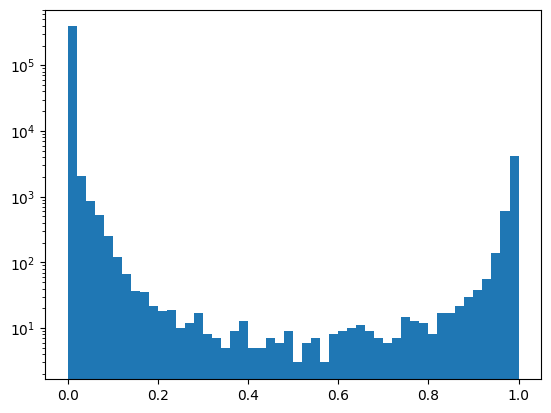

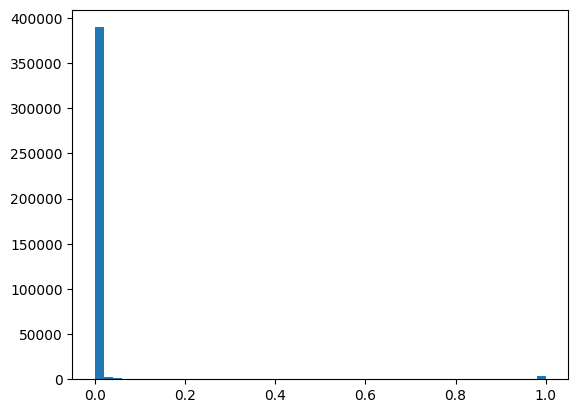

In [62]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.hist(all_blame_scores, log = True, bins = 50)
plt.show()

plt.figure()
plt.hist(all_blame_scores, bins = 50)
plt.show()

In [50]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [42]:
import math

math.exp(1.0)

2.718281828459045

In [ ]:
sentence_list = ast.literal_eval(input_str)
    except Exception:
        return []

    # List comprehension is faster than appending in a loop
    blame_binary = [
        int(
            (label_score := {label: score for label, score in zip(sent['labels'], sent['scores'])})['blame']
            >= max(label_score.get('praise', 0.0), label_score.get('neutral', 0.0), 0.8)
        )
        for sent in sentence_list

In [ ]:
# OBS:: clean columns when done:
import pandas as pd
import ast

#final_data = pd.read_csv("/work/MarkusLundsfrydJensen#1865/Bachelor_project/annotation_data_translated_with_blame_heuristics.csv")


cleaned_final_data = final_data

cleaned_final_data['blame_in_text'] = cleaned_final_data['blame_in_text'].apply(ast.literal_eval)
cleaned_final_data['blame_binary'] = cleaned_final_data['blame_binary'].apply(ast.literal_eval) 
cleaned_final_data['da_segmented_text'] = cleaned_final_data['da_segmented_text'].apply(ast.literal_eval) 


type(cleaned_final_data.loc[0]['blame_binary'])


ValueError: malformed node or string: [{'sequence': '[\'The meeting is open.\', \'Under the Constitution, the Folketing has today met for its first meeting in the new parliamentary year.\', "As the Member who has long since been a member of the Parliament, it is incumbent on me, pursuant to Paragraph 2 (3) of the Danish Parliament\'s Rules of Procedure, to direct the election of the Bureau of Things and the President of Parliament, Mr Erling Olsen, the Social Democratic Party, has been nominated by all the Members of Parliament.", \'In the absence of any other reco', 'labels': ['neutral', 'praise', 'blame'], 'scores': [0.9999992251396179, 1.5808068098976946e-07, 1.370228090991077e-07]}, {'sequence': 'mmendations, I shall consider the recommendation as adopted.\', \'(Stop).\', \'It has been adopted.\', "As Vice-Presidents, in addition to the party to which the President belongs, the four largest parties in the Chamber have appointed the following members: first Vice-President, Mr Ivar Hansen, Left, second Vice-President, Mr Henning Grove, Conservative People\'s Party, third Vice-President, Mrs Margrete Auken, Socialist People\'s Party, and fourth Vice-President, Mrs Elisabeth Arnold, Radical Left.", \'The person', 'labels': ['neutral', 'praise', 'blame'], 'scores': [0.9999994039535522, 2.2417496836624196e-07, 1.3154972577922308e-07]}, {'sequence': 's concerned are then elected.\', "According to the electoral federations and the group\'s recommendation, the following members were elected: Mrs Grete Schødt\'s, the Social Democratic Party, Mr Ove Fich, the Social Democratic Party, Mr Helge Sander, the Left, and Mr Niels Ahlmann-Ohlsen, the Conservative People\'s Party.", \'This is the way things are going, and I would ask the President-elect of the House to take the chair.\', \'I wish the Bureau every success in its work.\']', 'labels': ['neutral', 'praise', 'blame'], 'scores': [0.9999995231628418, 1.8202915441634104e-07, 1.3130636489222525e-07]}]

In [6]:
cleaned_final_data.loc[0]['blame_in_text']

[{'sequence': 'The meeting is open.',
  'labels': ['neutral', 'blame', 'praise'],
  'scores': [0.999998927116394,
   1.1550985163921723e-06,
   1.695876505891647e-07]},
 {'sequence': 'Under the Constitution, the Folketing has today met for its first meeting in the new parliamentary year.',
  'labels': ['neutral', 'praise', 'blame'],
  'scores': [0.9999994039535522,
   2.025911953751347e-07,
   1.3265680820495618e-07]},
 {'sequence': "As the Member who has long since been a member of the Parliament, it is incumbent on me, pursuant to Paragraph 2 (3) of the Danish Parliament's Rules of Procedure, to direct the election of the Bureau of Things and the President of Parliament, Mr Erling Olsen, the Social Democratic Party, has been nominated by all the Members of Parliament.",
  'labels': ['neutral', 'praise', 'blame'],
  'scores': [0.9999915361404419,
   1.426016211780734e-07,
   1.3001931620237883e-07]},
 {'sequence': 'In the absence of any other recommendations, I shall consider the reco

In [7]:
cleaned_final_data.to_csv("/work/MarkusLundsfrydJensen#1865/Bachelor_project/cleaned_annotation_data_translated_with_blame_heuristics.csv", index = False)


In [63]:
#preprocess data for label studio

import json

# Load your data
with open("/work/MarkusLundsfrydJensen#1865/Bachelor_project/danish_blame.json", "r", encoding="utf-8") as f:
    data = json.load(f)

flattened = []

for paragraph, sentences in data.items():
    for sentence_nr, text in sentences.items():
        flattened.append({
            "paragraph": paragraph,
            "sentence_nr": sentence_nr,
            "text": text
        })

# Save in a format Label Studio can import
with open("/work/MarkusLundsfrydJensen#1865/Bachelor_project/labelstudio_data.json", "w", encoding="utf-8") as f:
    json.dump(flattened, f, ensure_ascii=False, indent=2)


In [72]:
final_data.head()

,Unnamed: 0,date,agenda,speechnumber,speaker,party,party.facts.id,chair,terms,text,parliament,iso3country,da_segmented_text,translated_text,blame_in_text,blame_binary
0,0,1997-10-07,Dagsorden,1,Gert Petersen,NaN,NaN,True,191,Mødet er åbnet. I henhold til grundloven er Fo...,DK-Folketing,DNK,"['Mødet er åbnet.', 'I henhold til grundloven ...","['The meeting is open.', 'Under the Constituti...","[{'sequence': 'The meeting is open.', 'labels'...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,1,1997-10-07,Dagsorden,2,Formanden,NaN,NaN,True,182,"Jeg vil gerne takke Tinget for den tillid, man...",DK-Folketing,DNK,"['Jeg vil gerne takke Tinget for den tillid, m...",['I would like to thank Things for the confide...,[{'sequence': 'I would like to thank Things fo...,"[0, 0, 0, 0, 0, 0, 0, 0]"
2,2,1997-10-07,Statsministerens redegørelse i henhold til gru...,3,Poul Nyrup Rasmussen,S,379.0,False,18662,For 25 år siden sagde et flertal i befolkninge...,DK-Folketing,DNK,['For 25 år siden sagde et flertal i befolknin...,"['Twenty-five years ago, a majority of the peo...","[{'sequence': 'Twenty-five years ago, a majori...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,1997-10-09,1) Indstilling fra Udvalget til Valgs Prøvelse.,2,Formanden,NaN,NaN,True,47,Fra Udvalget til Valgs Prøvelse har jeg modtag...,DK-Folketing,DNK,"['Fra Udvalget til Valgs', 'Prøvelse', 'har je...",['From the Committee to the Committee of the R...,[{'sequence': 'From the Committee to the Commi...,"[0, 0, 0, 0, 0]"
4,4,1997-10-09,2) Forhandling om redegørelse nr. R 1.,3,Torben Lund,S,379.0,False,2865,Vi står over for en meget afgørende folketings...,DK-Folketing,DNK,['Vi står over for en meget afgørende folketin...,['We are faced with a very crucial parliamenta...,[{'sequence': 'We are faced with a very crucia...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [73]:
meta_data = final_data[['Unnamed: 0','speaker','party']]
meta_data.head()

,Unnamed: 0,speaker,party
0,0,Gert Petersen,NaN
1,1,Formanden,NaN
2,2,Poul Nyrup Rasmussen,S
3,3,Formanden,NaN
4,4,Torben Lund,S


In [78]:
#connect with meta data
import json
import pandas as pd

# Load the flattened sentence JSON
with open("/work/MarkusLundsfrydJensen#1865/Bachelor_project/labelstudio_data.json", "r", encoding="utf-8") as f:
    sentences = json.load(f)

# Load metadata
meta = meta_data



# Convert metadata to dict for fast lookup
meta_dict = meta.set_index("Unnamed: 0").to_dict(orient="index")

# Merge
for item in sentences:
    paragraph = int(item["paragraph"])
    if paragraph in meta_dict:
        item.update(meta_dict[paragraph])

# Save merged dataset
with open("/work/MarkusLundsfrydJensen#1865/Bachelor_project/labelstudio_merged.json", "w", encoding="utf-8") as f:
    json.dump(sentences, f, ensure_ascii=False, indent=2)


In [79]:
meta_dict

{0: {'speaker': 'Gert Petersen', 'party': nan},
 1: {'speaker': 'Formanden', 'party': nan},
 2: {'speaker': 'Poul Nyrup Rasmussen', 'party': 'S'},
 3: {'speaker': 'Formanden', 'party': nan},
 4: {'speaker': 'Torben Lund', 'party': 'S'},
 5: {'speaker': 'Formanden', 'party': nan},
 6: {'speaker': 'Frank Aaen', 'party': 'EL'},
 7: {'speaker': 'Pia Kjærsgaard', 'party': 'DF'},
 8: {'speaker': 'Kristian Thulesen Dahl', 'party': 'DF'},
 9: {'speaker': 'Formanden', 'party': nan},
 10: {'speaker': 'Jan Køpke Christensen', 'party': 'FP'},
 11: {'speaker': 'Jette Gottlieb', 'party': 'EL'},
 12: {'speaker': 'Torben Lund', 'party': 'S'},
 13: {'speaker': 'Poul Nødgaard', 'party': 'DF'},
 14: {'speaker': 'Jes Lunde', 'party': 'SF'},
 15: {'speaker': 'Tom Behnke', 'party': 'FP'},
 16: {'speaker': 'Keld Albrechtsen', 'party': 'EL'},
 17: {'speaker': 'Torben Lund', 'party': 'S'},
 18: {'speaker': 'Frank Dahlgaard', 'party': 'KF'},
 19: {'speaker': 'Aage Frandsen', 'party': 'SF'},
 20: {'speaker': 'Ar